In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Performing Explotary Data Analysis Steps to check the data and importing all libraries and tools

In [3]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("/content/drive/MyDrive/Telco_customer_churn.xlsx")
df


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [4]:
df.shape


(7043, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
df.isna().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


so there is only one column that has 5174 null values and much object type column,


# lets save the categorical or numerical feature in different variable

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Numerical Columns: {num_cols}")
print(f"Categorical Columns: {cat_cols}")


Numerical Columns: ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']
Categorical Columns: ['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn Label', 'Churn Reason']


# Lets see the some basic Visualization

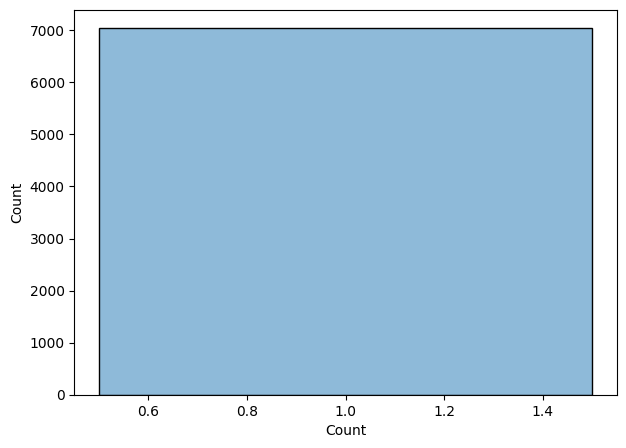

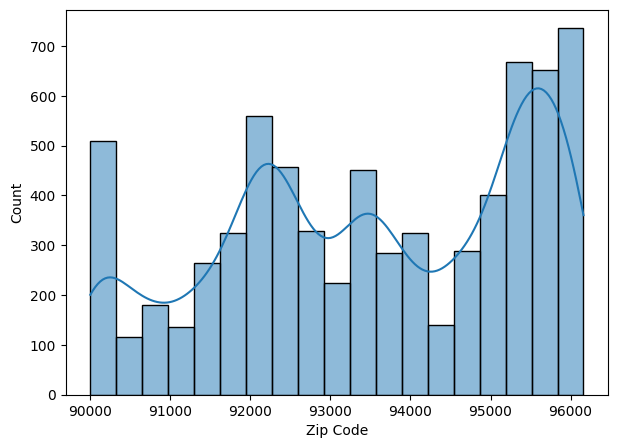

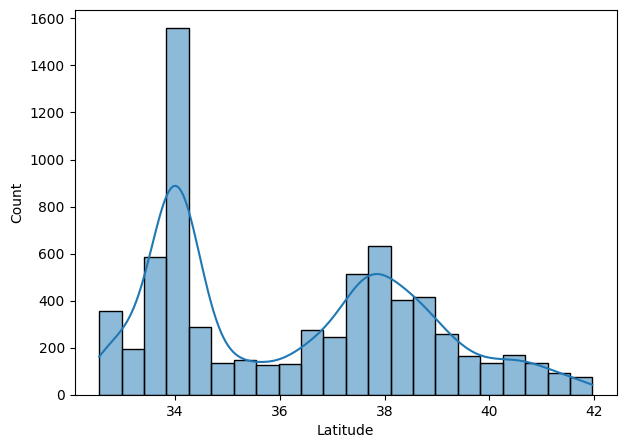

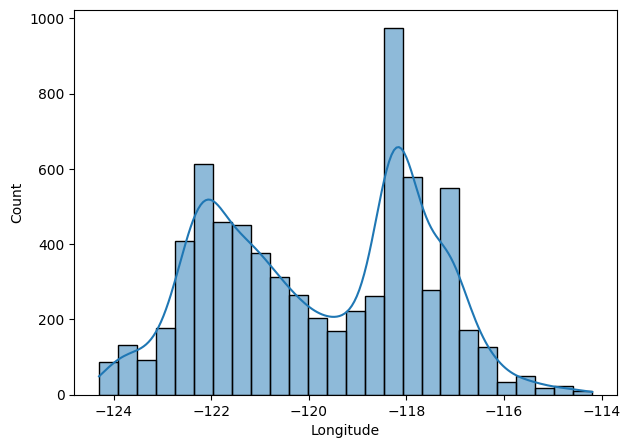

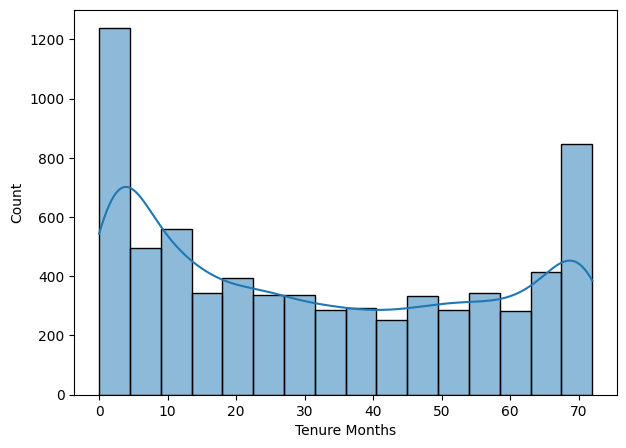

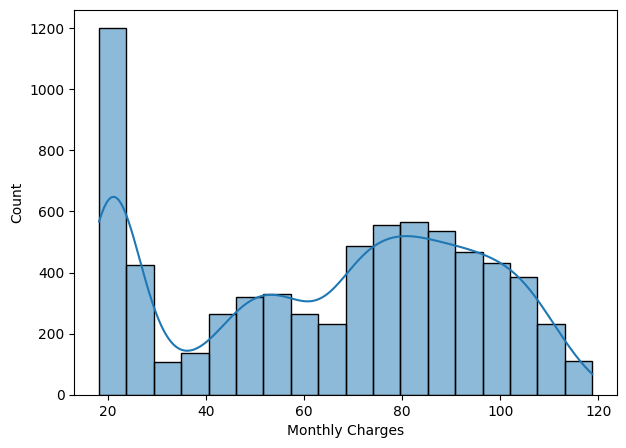

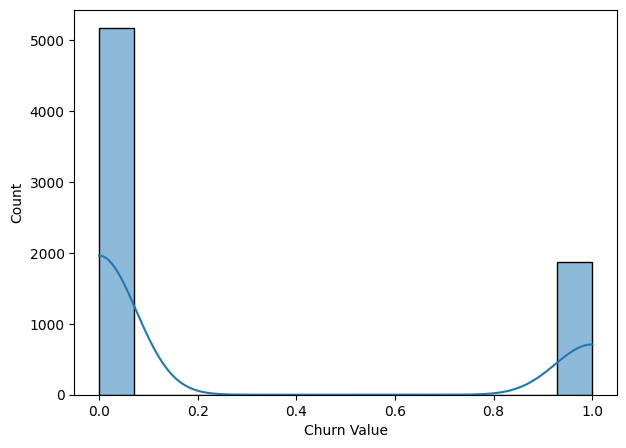

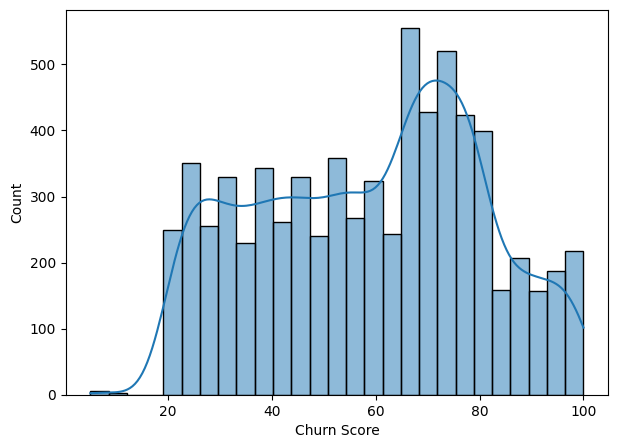

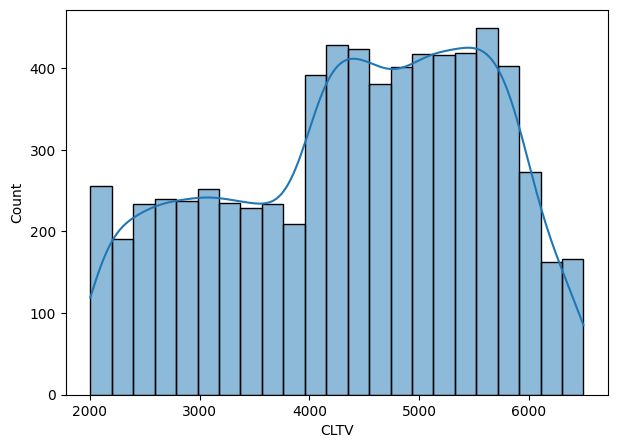

In [8]:
for cols in num_cols:
    plt.figure(figsize=(7,5))
    sns.histplot(df[cols],kde=True)

Mhmm interesting lets compared categorical cols with target column

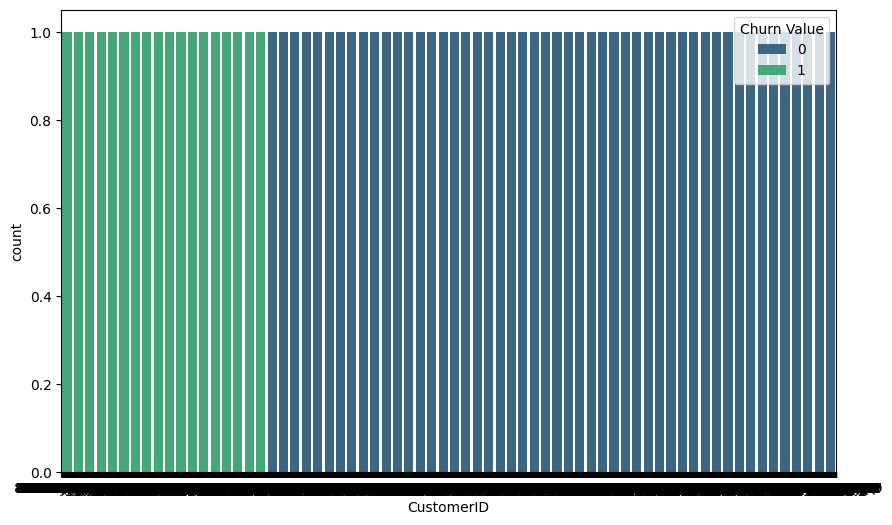

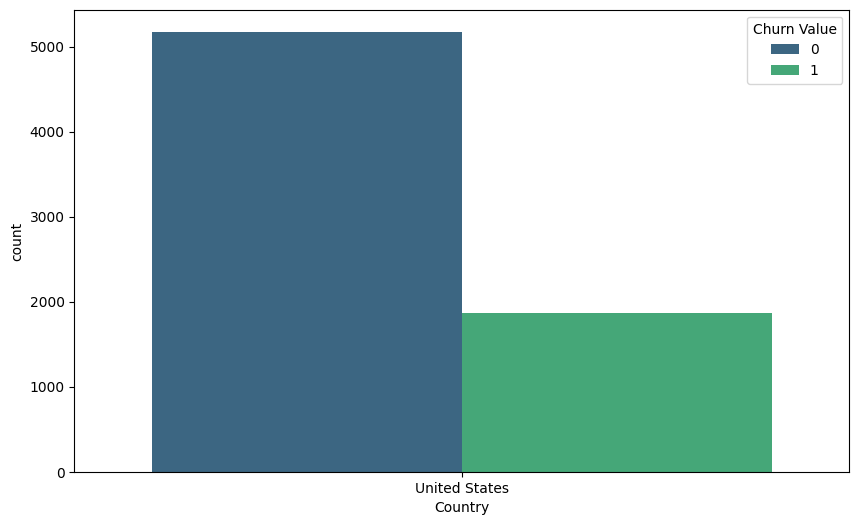

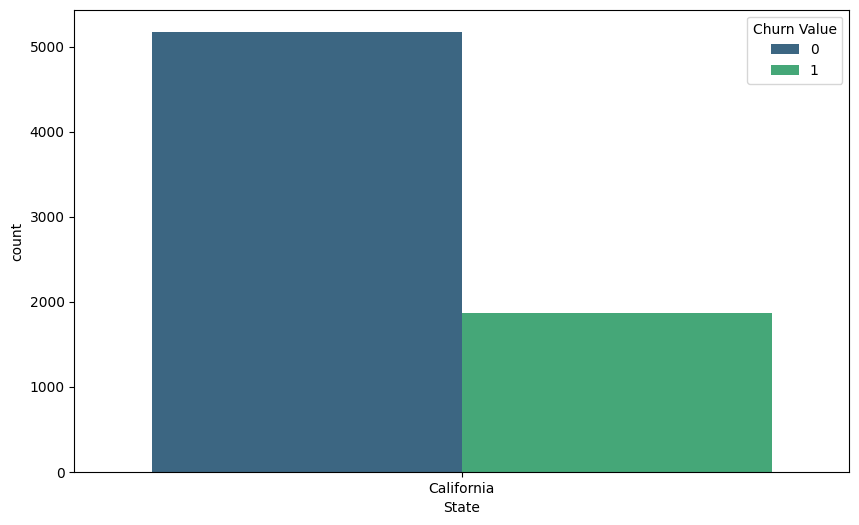

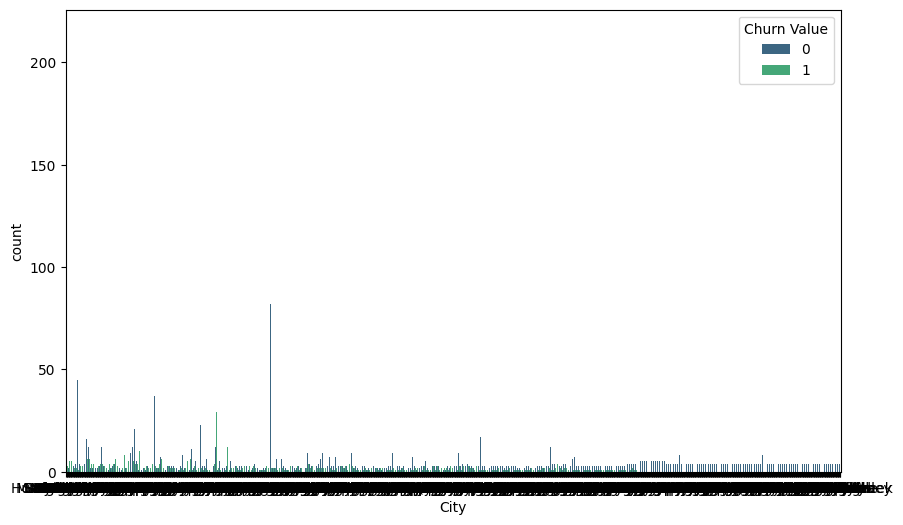

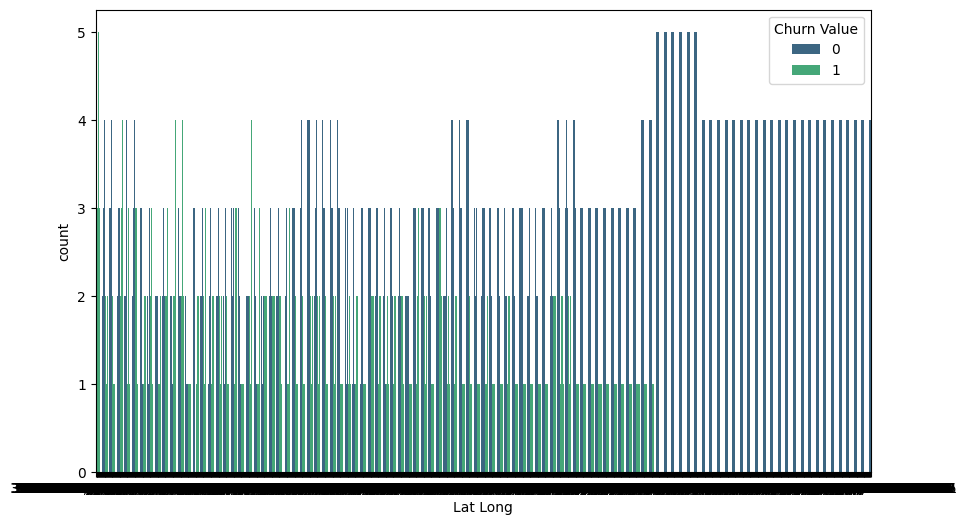

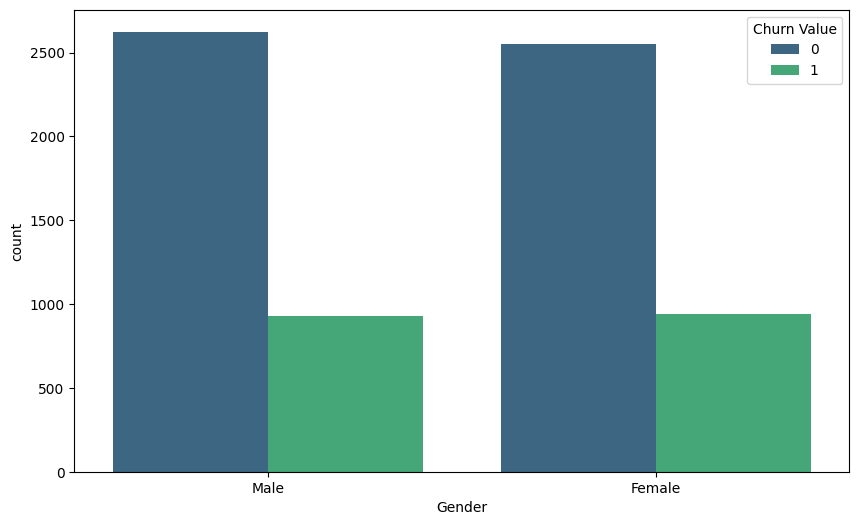

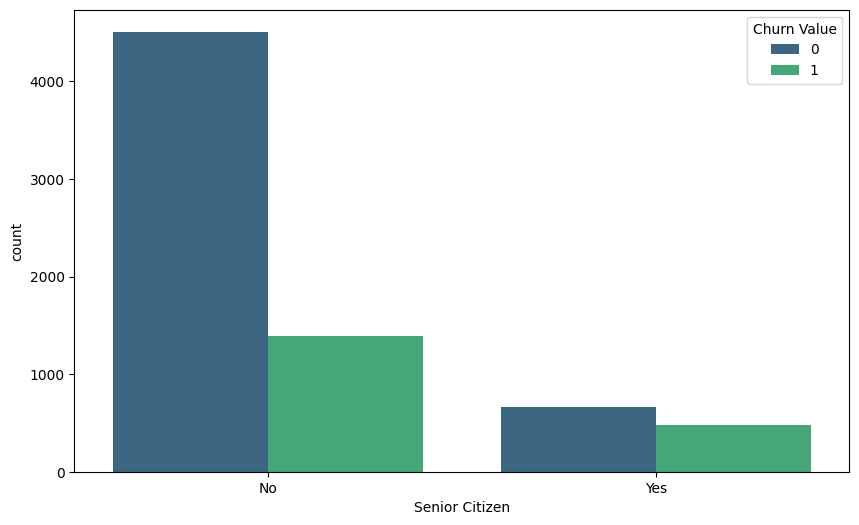

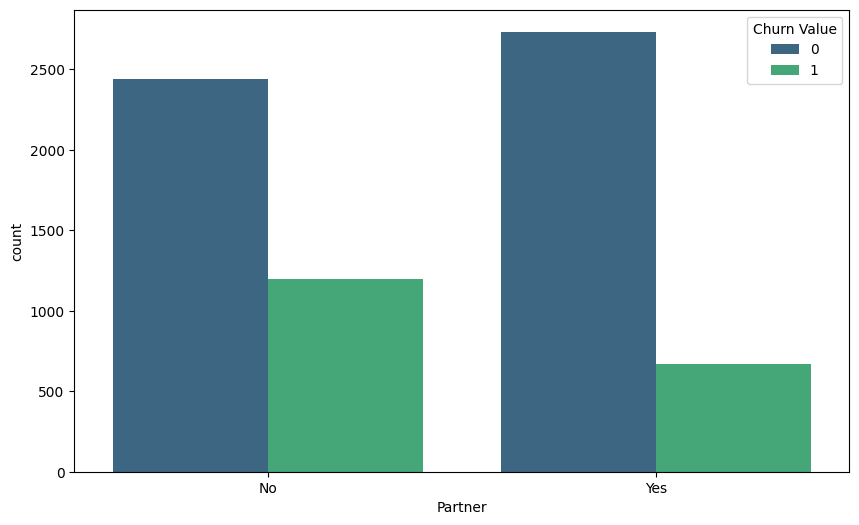

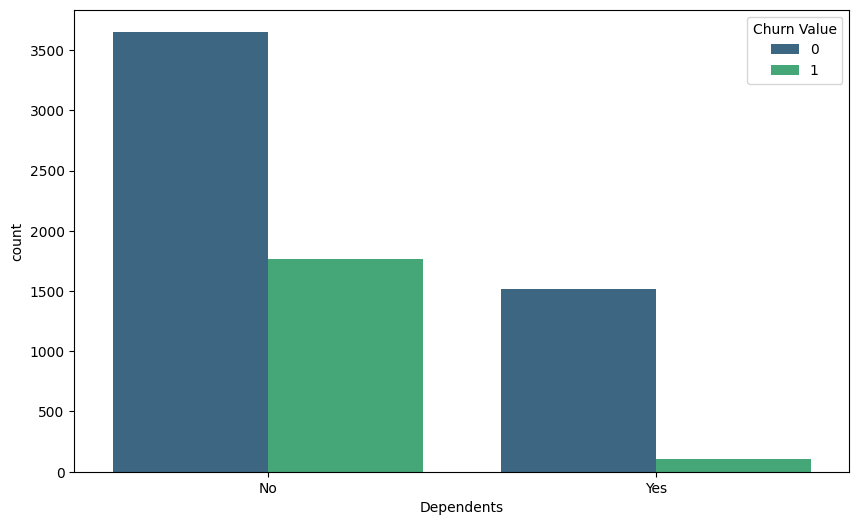

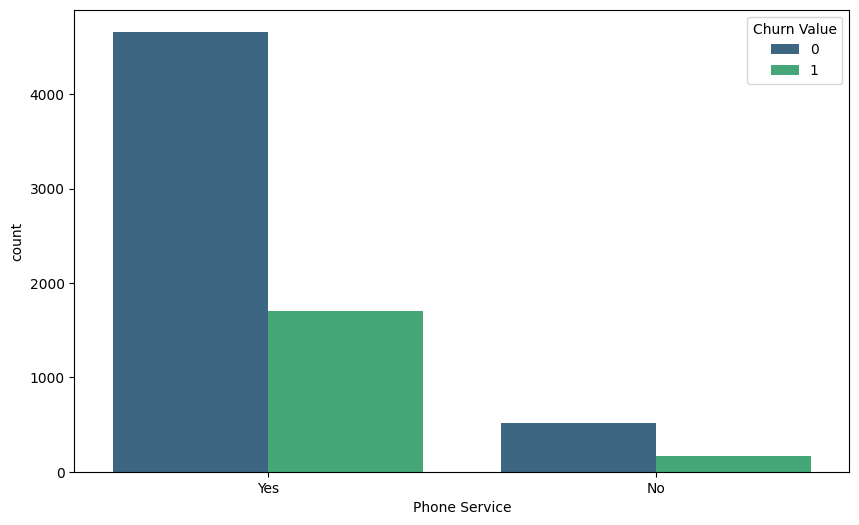

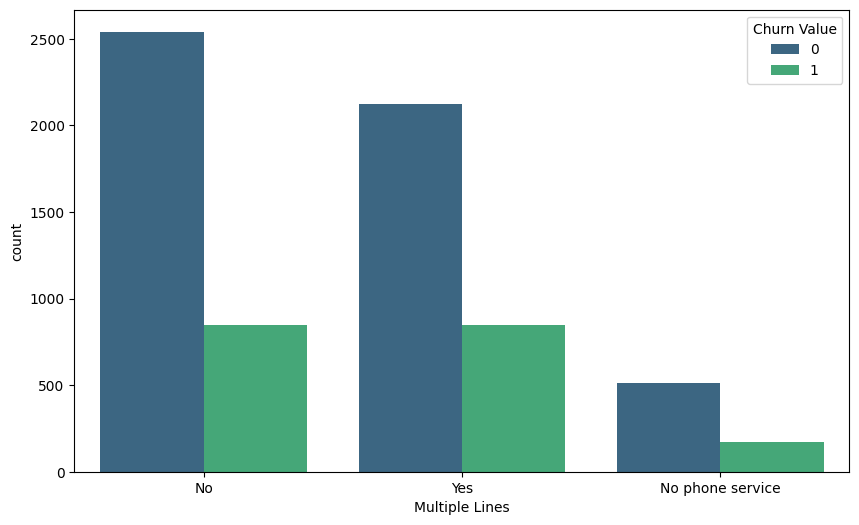

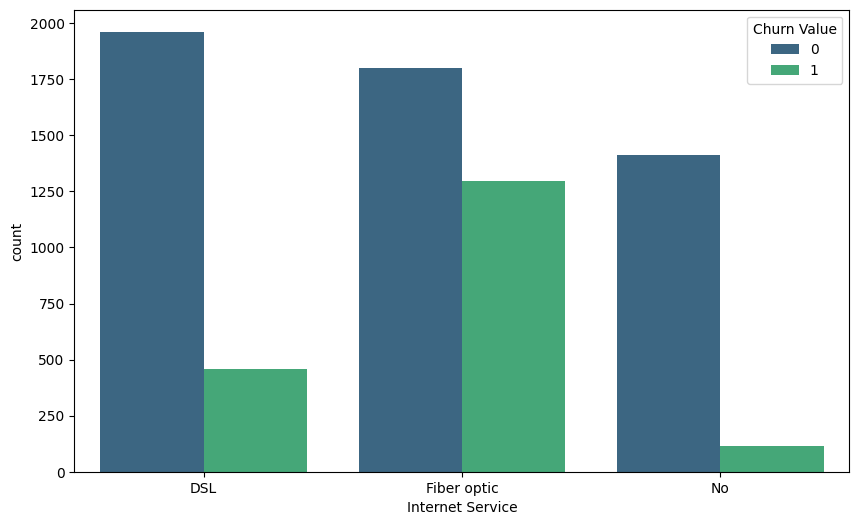

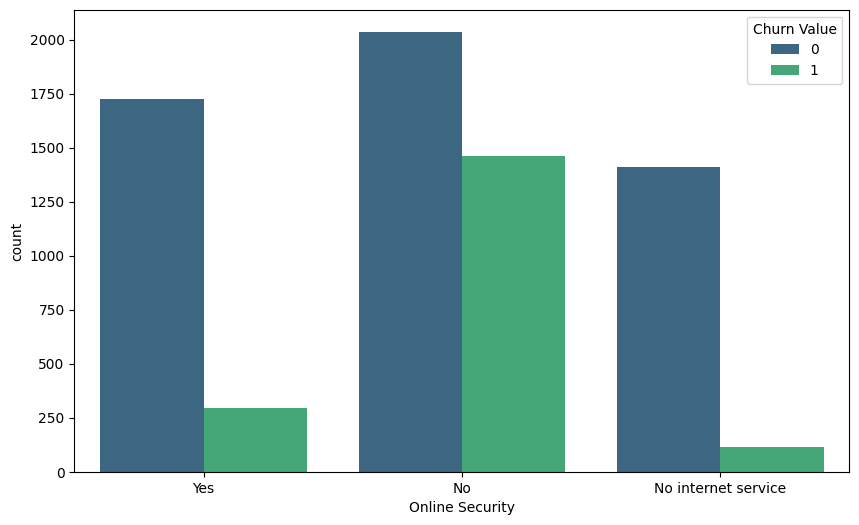

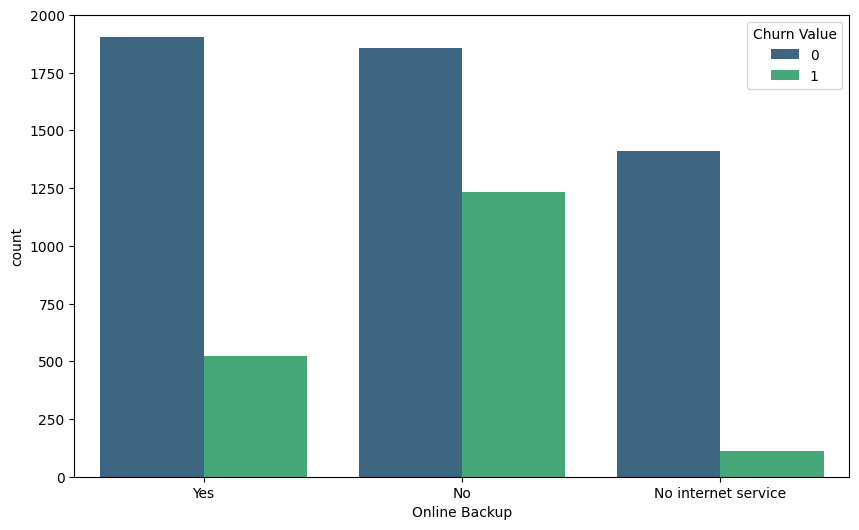

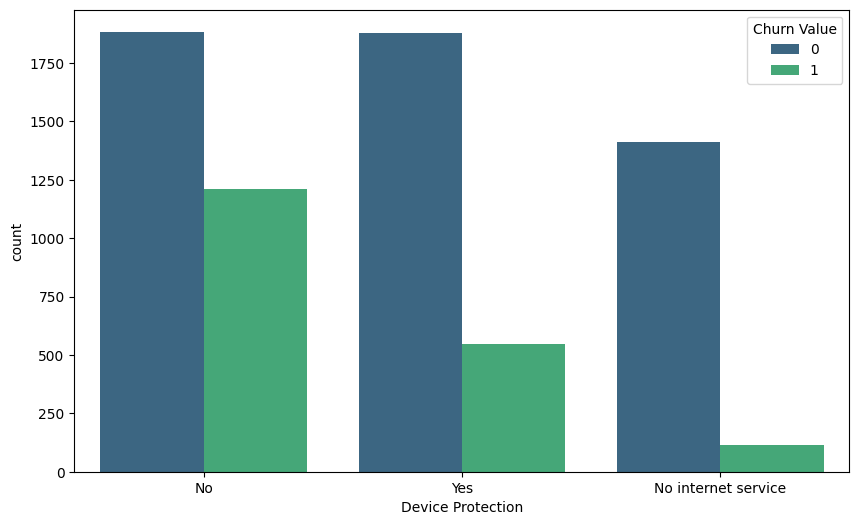

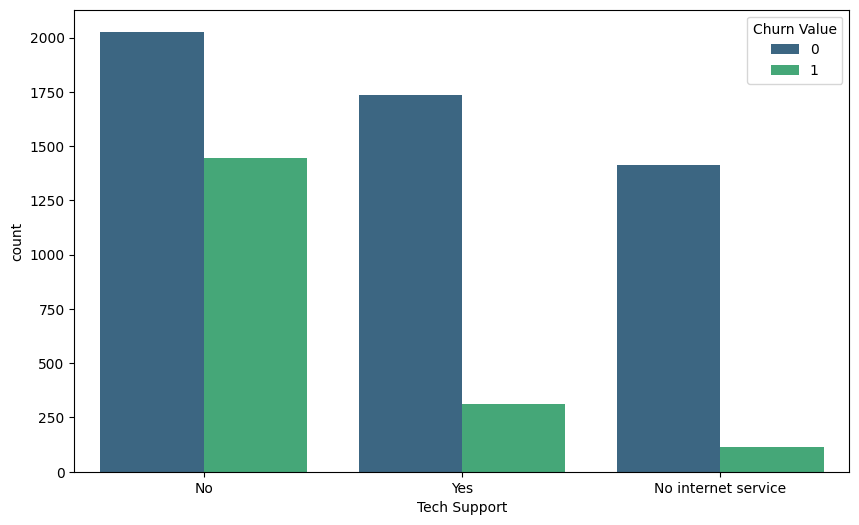

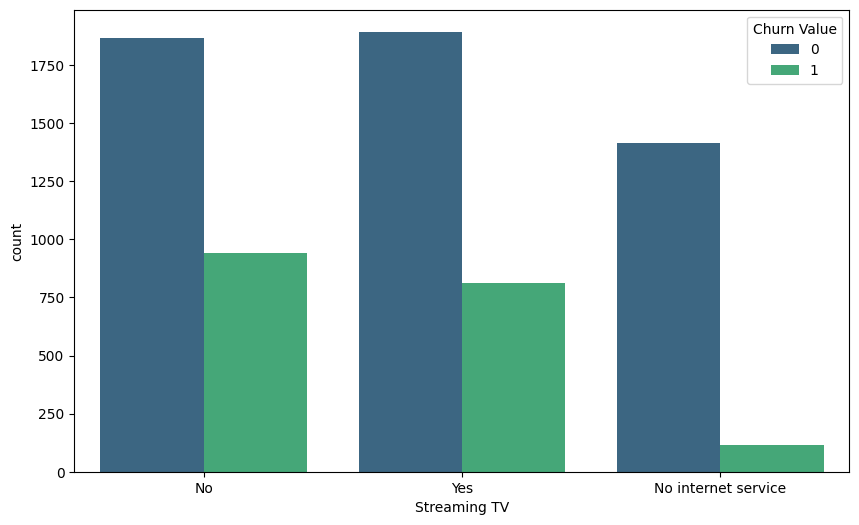

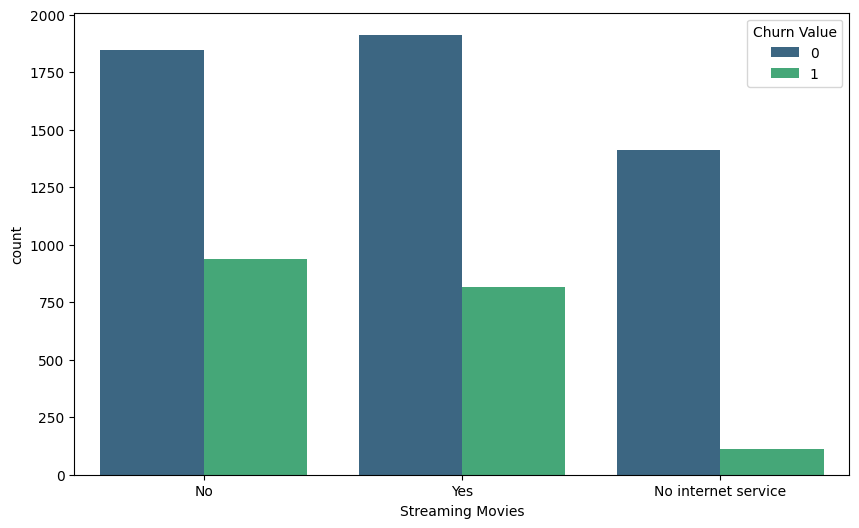

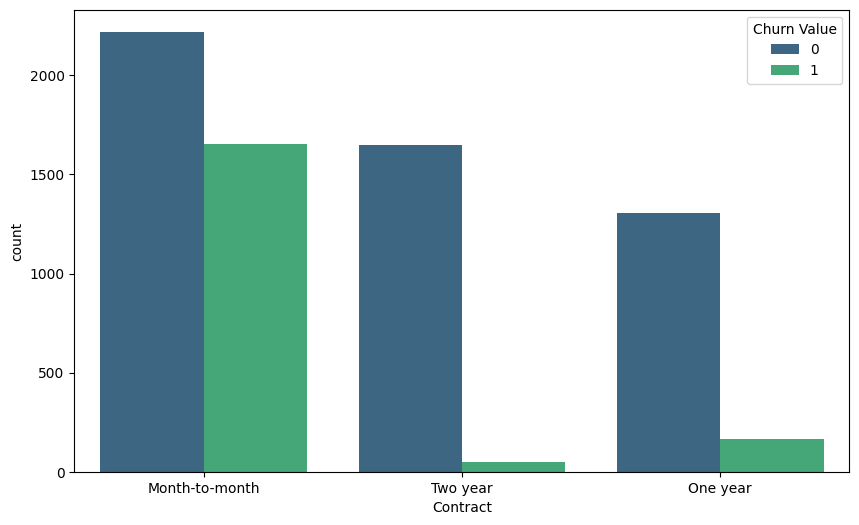

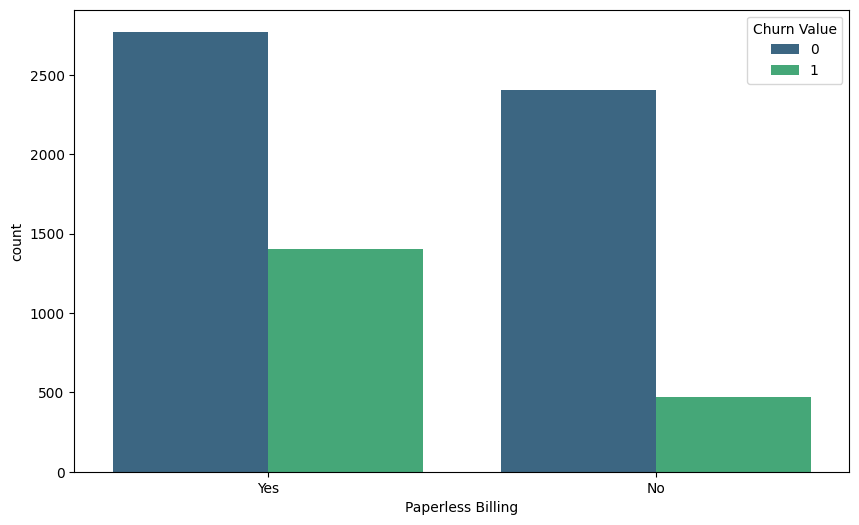

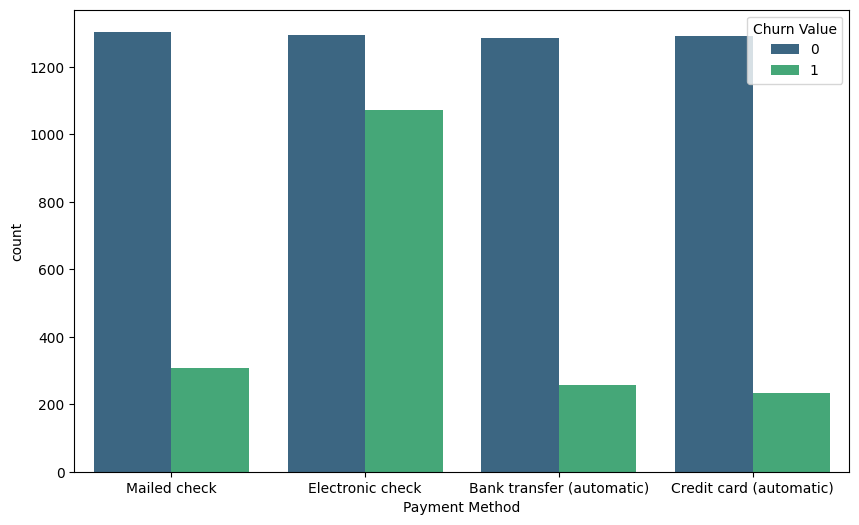

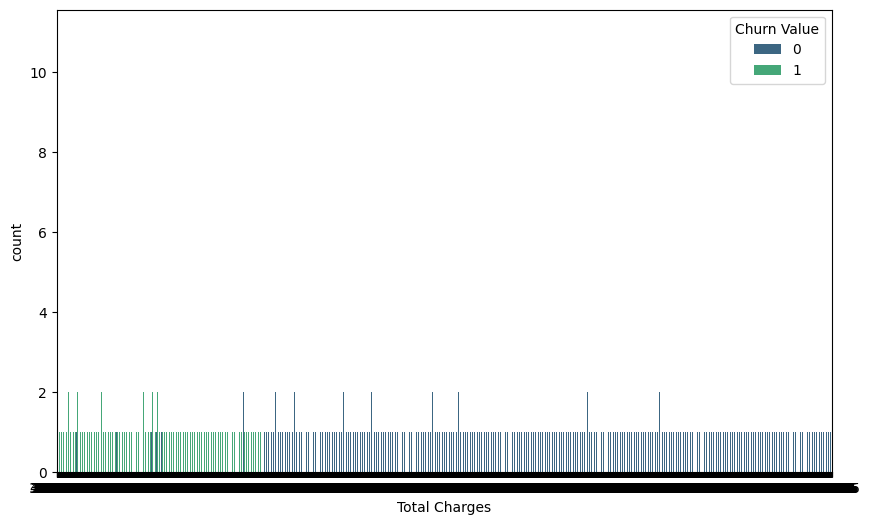

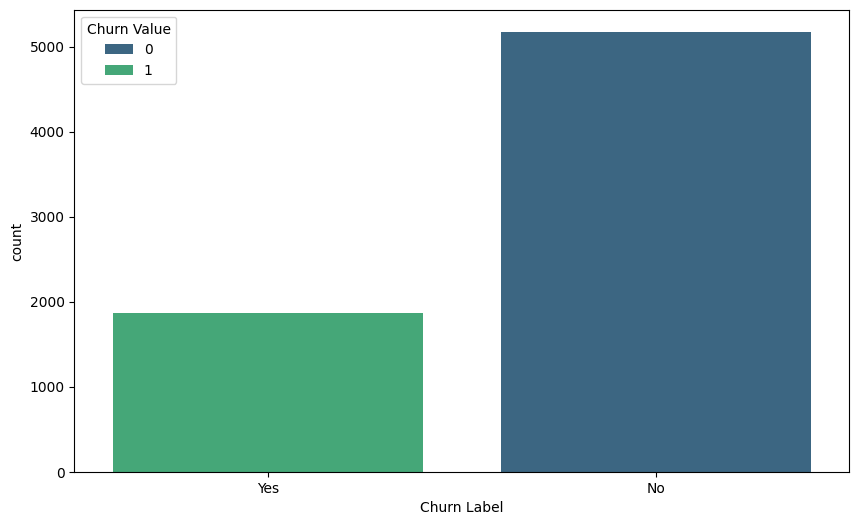

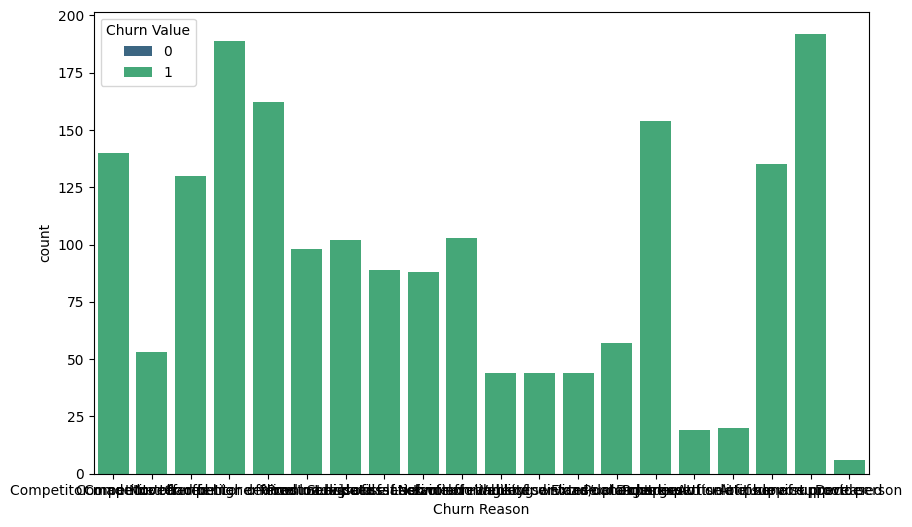

In [9]:
for col in cat_cols:

    plt.figure(figsize=(10, 6))

    sns.countplot(
        data=df,
        x=col,
        hue='Churn Value',
        palette='viridis'
    )

In [10]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


uhm okay so lets remove the feature that we don't need to proceed

In [11]:
import pandas as pd

# List of columns to drop (Based on EDA and Leakage Risk)
COLUMNS_TO_DROP = [
    # 1. ID and Index Columns
    'CustomerID',
    'Zip Code',
    'Country',
    'State',
    'Lat Long',
    'Latitude',
    'Longitude',

    # 2. Data Leakage / Post-Facto Columns
    'Churn Score',
    'CLTV',
    'Churn Reason',
]

# Drop the columns permanently from the DataFrame

df.drop(COLUMNS_TO_DROP, axis=1, inplace=True)

print("Unnecessary and leakage columns successfully dropped.")
print(f"Remaining Columns: {df.columns.tolist()}")

Unnecessary and leakage columns successfully dropped.
Remaining Columns: ['Count', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value']


Lets see the corelation of our data with target values because we just need those features that are related with our columns

# Feature Engineering

# Lets see the relation of continours number with target

In [12]:
from scipy.stats import pearsonr

# Convert 'Total Charges' to numeric, coercing errors to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')




# Get all numerical columns (excluding 'Churn Value' itself as a feature for correlation calculation)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Churn Value' in numerical_features:
    numerical_features.remove('Churn Value')

correlations = {}
for feature in numerical_features:
    # Calculate the Pearson R-value (R) and the P-value (P)
    # The output of pearsonr is a tuple: (r_value, p_value)
    r_value, p_value = pearsonr(df[feature], df["Churn Value"])

    # Store both values in the dictionary
    correlations[feature] = {
        'Pearson Correlation': r_value,
        'P-Value': p_value
    }

# Convert the dictionary into a DataFrame for easier analysis
correlation_df = pd.DataFrame.from_dict(correlations, orient='index').reset_index()
correlation_df.columns = ['Feature', 'Pearson Correlation', 'P-Value']

# Sort the results to see the strongest correlations first
correlation_df = correlation_df.sort_values(by="Pearson Correlation", ascending=False)

# Display the correlation dataframe
print(correlation_df)


           Feature  Pearson Correlation        P-Value
2  Monthly Charges             0.193356   2.706646e-60
1    Tenure Months            -0.352229  7.999058e-205
0            Count                  NaN            NaN
3    Total Charges                  NaN            NaN


# Lets see the categorical columns relation with target by Chi2

In [13]:
# Assuming 'df' is the clean DataFrame with encoded features
# TARGET: Use the final binary target variable directly
from scipy.stats import chi2_contingency
TARGET_VARIABLE = 'Churn Value'
alpha = 0.05 # Significance Level

# 1. Categorical Features ki list nikalna
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()


# 2. Chi-Square Test Loop
chi2_results = {}
for feature in cat_features:
    # 2-way Contingency Table banana
    contingency_table = pd.crosstab(df[feature], df[TARGET_VARIABLE])


    # Chi-Square Test chalana
    # P-value, Degree of Freedom (dof)
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Saving the result
    chi2_results[feature] = {
        'Chi2_Statistic': chi2_stat,
        'p_value': p_value,
        'Significant (p < 0.05)': p_value < alpha
    }

# 3. Changing the result in datafrae by sorting it
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index').reset_index()
chi2_df.columns = ['Feature', 'Chi2_Statistic', 'p_value', 'Significant']

# 4. Sort (according to p-value)
chi2_df = chi2_df.sort_values(by="p_value", ascending=True)

print("--- Chi-Square Test Results ---")
print(chi2_df)

--- Chi-Square Test Results ---
              Feature  Chi2_Statistic        p_value  Significant
17        Churn Label     7037.871379   0.000000e+00         True
14           Contract     1184.596572  5.863038e-258         True
8     Online Security      849.998968  2.661150e-185         True
11       Tech Support      828.197068  1.443084e-180         True
7    Internet Service      732.309590  9.571788e-160         True
16     Payment Method      648.142327  3.682355e-140         True
9       Online Backup      601.812790  2.079759e-131         True
10  Device Protection      558.419369  5.505219e-122         True
4          Dependents      433.734379   2.500972e-96         True
13   Streaming Movies      375.661479   2.667757e-82         True
12       Streaming TV      374.203943   5.528994e-82         True
15  Paperless Billing      258.277649   4.073355e-58         True
2      Senior Citizen      159.426300   1.510067e-36         True
3             Partner      158.733382   2.13

# We got our Features lets save all Features in one variable

In [14]:

FINAL_FEATURES = [
    'Contract',
    'Online Security',
    'Tech Support',
    'Payment Method',
    'Tenure Months',
    'Monthly Charges',
    'Total Charges',
    'Churn Value'
]

final_df = df[FINAL_FEATURES].copy()


# Lets  save into X and Y for Training the model

In [15]:
mixed_data = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

X = mixed_data.drop('Churn Value', axis=1)
Y = mixed_data['Churn Value']



# Now Split into train and test

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


# Lets create the Preprocessing Pipeline

In [17]:
# Setting the Numeric Features for Pipeine
numeric_features_for_pipeline = [
    'Tenure Months',
    'Monthly Charges',
    'Total Charges'
]

# Setting the Categorical Features for pipeline
categorical_features_for_pipeline = [
    'Online Security',
    'Tech Support',
    'Contract',
    'Payment Method'
]
# 2. Define the Categorical feature in Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Filling the missing categories
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
# Define the Numerical Features in Pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Setting the Column Transformer
# Now Preprocessor handle both categorical or numerical feature
preprocessor = ColumnTransformer(
    transformers=[

        ('num_pipe', numerical_transformer,numeric_features_for_pipeline),


        ('cat_pipe', categorical_transformer, categorical_features_for_pipeline)
    ],
    remainder='drop'
)
# Transforming the X_train or fit in X train or Y train
X_train_transformed = preprocessor.fit_transform(X_train, Y_train)

# Checking All the values are transformed or not

In [18]:
# This confirms that you are watching (transformed) data
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())

print("--- Checking Transformed Data ---")
print(f"New Shape: {X_train_transformed_df.shape}")
print(f"All Dtypes (Should be float): {X_train_transformed_df.dtypes.value_counts()}")
print(f"Total NaN Count (Should be 0): {X_train_transformed_df.isna().sum().sum()}")
missing_numeric = [
    col for col in numeric_features_for_pipeline
    if col not in X_train_transformed_df.columns # Using the DataFrame
]


missing_categorical = [
    col for col in categorical_features_for_pipeline
    if col not in X_train_transformed_df.columns # Using the DataFrame
]
if missing_numeric:
    print("\n!!! WARNING: Missing numeric features in X_train:", missing_numeric)
if missing_categorical:
    print("\n!!! WARNING: Missing categorical features in X_train:", missing_categorical)

print("\n--- End Debugging ---")
Y.dtype

--- Checking Transformed Data ---
New Shape: (5634, 16)
All Dtypes (Should be float): float64    16
Name: count, dtype: int64
Total NaN Count (Should be 0): 0

!!! WARNING: Missing numeric features in X_train: ['Tenure Months', 'Monthly Charges', 'Total Charges']

!!! WARNING: Missing categorical features in X_train: ['Online Security', 'Tech Support', 'Contract', 'Payment Method']

--- End Debugging ---


dtype('int64')

# Setting the Models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Cleaning, Imputation, Scaling
    ('classifier', LogisticRegression(class_weight='balanced',solver='liblinear', max_iter=2000, random_state=42))
])

# Training
lr_pipeline.fit(X_train, Y_train)

# Evaluation
lr_preds = lr_pipeline.predict(X_test)
print("--- LOGISTIC REGRESSION (LR) PERFORMANCE ---")
print(f"Accuracy: {accuracy_score(Y_test, lr_preds):.4f}")
print(classification_report(Y_test, lr_preds))

# Random Forest Pipeline
# There is not need for scaling but Preprocessor is important
rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Cleaning, Imputation, Scaling
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))
])

# Training
rfc_pipeline.fit(X_train, Y_train)

# Evaluation
rfc_preds = rfc_pipeline.predict(X_test)
print("\n--- RANDOM FOREST CLASSIFIER (RFC) PERFORMANCE ---")
print(f"Accuracy: {accuracy_score(Y_test, rfc_preds):.4f}")
print(classification_report(Y_test, rfc_preds))

--- LOGISTIC REGRESSION (LR) PERFORMANCE ---
Accuracy: 0.7253
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1036
           1       0.49      0.77      0.60       373

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.73      0.74      1409


--- RANDOM FOREST CLASSIFIER (RFC) PERFORMANCE ---
Accuracy: 0.7736
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.59      0.49      0.53       373

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



# Now Tune the Random Forest Classifier with Class_weight: Balanced

In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Simple RFC Model
rfc_model = RandomForestClassifier(class_weight='balanced',random_state=42)

# Final Pipeline: Preprocessor + Simple RFC
final_rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Cleaning, Imputation, Encoding
    ('classifier', rfc_model)       # Simple Random Forest
])

#  RSCV Setup (Only RFC Parameters)

RFC_PARAMS = {
    'classifier__n_estimators': [100, 300, 500, 800],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
}

RSCV_RFC = RandomizedSearchCV(
    estimator=final_rfc_pipeline,
    param_distributions=RFC_PARAMS,
    n_iter=20,
    cv=5,
    scoring='recall',
    random_state=42
)

# Fit the simple pipeline
RSCV_RFC.fit(X_train, Y_train)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'classifier__max_depth': [5, 10, ...], 'classifier__min_samples_split': [2, 5, ...], 'classifier__n_estimators': [100, 300, ...]}"
,n_iter,20
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [21]:

# Evaluation
y_preds = RSCV_RFC.predict(X_test)
print("\n--- RANDOM FOREST CLASSIFIER (RFC) PERFORMANCE ---")
print(f"Accuracy: {accuracy_score(Y_test, y_preds):.4f}")
print(classification_report(Y_test, y_preds))


--- RANDOM FOREST CLASSIFIER (RFC) PERFORMANCE ---
Accuracy: 0.7339
              precision    recall  f1-score   support

           0       0.91      0.70      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409



In [22]:
# Find the probabilites in Test Data
y_probs = RSCV_RFC.predict_proba(X_test)

# Just take Class 1 (Churn) probability
y_probs_churn = y_probs[:, 1]

In [23]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score
# Calculate the Precision, Recall aur Thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_probs_churn)

# Creating a function that shows difference threshold values
def evaluate_threshold(y_true, y_probs, threshold):
    # Make new Predictions
    y_preds_new = (y_probs >= threshold).astype(int)

    # Performance metrics
    print(f"\n--- Threshold: {threshold:.2f} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_preds_new):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_preds_new))

# Now check some threshold
# Current default threshold  is 0.50
evaluate_threshold(Y_test, y_probs_churn, 0.50)

# Improve the churn precision improve the threshold
evaluate_threshold(Y_test, y_probs_churn, 0.60) # need 60% confidence
evaluate_threshold(Y_test, y_probs_churn, 0.70) # need 70% confidence


--- Threshold: 0.50 ---
Accuracy: 0.7339
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409


--- Threshold: 0.60 ---
Accuracy: 0.7686
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.55      0.66      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.79      0.77      0.77      1409


--- Threshold: 0.70 ---
Accuracy: 0.7842
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.62      0.47      0.5

In [24]:
# Function that defines before
def evaluate_threshold(y_true, y_probs, threshold):
    y_preds_new = (y_probs >= threshold).astype(int)
    print(f"\n--- Threshold: {threshold:.2f} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_preds_new):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_preds_new))

# Checking the new thresholds

print("\n\n--- TESTING NEW THRESHOLDS ---")
# Checking the Threshold 0.53
evaluate_threshold(Y_test, y_probs_churn, 0.53)

# Checking the Threshold 0.55
evaluate_threshold(Y_test, y_probs_churn, 0.55)



--- TESTING NEW THRESHOLDS ---

--- Threshold: 0.53 ---
Accuracy: 0.7473
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1036
           1       0.52      0.76      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409


--- Threshold: 0.55 ---
Accuracy: 0.7601
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1036
           1       0.53      0.75      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [25]:
# Finding the best Hyperparamters with RSCV_RFC
print("Best Hyperparameters from RSCV:")
print(RSCV_RFC.best_params_)

Best Hyperparameters from RSCV:
{'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__max_depth': 5}


In [26]:
final_best_pipeline = RSCV_RFC.best_estimator_

In [27]:

# Finding the probabilities by best Estimator
y_probs_final = final_best_pipeline.predict_proba(X_test)
y_probs_churn_final = y_probs_final[:, 1]

# Applying the new threshold 0.55
FINAL_THRESHOLD = 0.55
y_preds_final = (y_probs_churn_final >= FINAL_THRESHOLD).astype(int)

print(f"\n--- FINAL RFC MODEL PERFORMANCE (THRESHOLD {FINAL_THRESHOLD:.2f}) ---")
print(f"Accuracy: {accuracy_score(Y_test, y_preds_final):.4f}")
print(classification_report(Y_test, y_preds_final))

# This is the confirmation that our final model and rule is ready



--- FINAL RFC MODEL PERFORMANCE (THRESHOLD 0.55) ---
Accuracy: 0.7601
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1036
           1       0.53      0.75      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [28]:
# Checking the all columns those are included in model
new_customer_data = pd.DataFrame({
    'Monthly Charges': [float(75.50)],
    'Online Security': ['No'],
    'Total Charges': [float(1200.00)],
    'Tech Support': ['Yes'],
    'Tenure Months': [int(16)],
    'Payment Method': ['Electronic check'],
    'Contract': ['Month-to-month'],

})

# Now trying to make predictions
churn_probability = RSCV_RFC.best_estimator_.predict_proba(new_customer_data)[:, 1]

# And Final Decision
FINAL_THRESHOLD = 0.55
if churn_probability[0] >= FINAL_THRESHOLD:
    print("ACTION REQUIRED: Customer Churn Risk is HIGH!")
else:
    print("Customer is Stable.")

ACTION REQUIRED: Customer Churn Risk is HIGH!


In [29]:
# RSCV_RFC.best_estimator_ is out best pipeline
final_pipeline = RSCV_RFC.best_estimator_
# Bypass the preprocessor and find the Final RFC Model
# In Pipeline 'Classifier' step is our RFC model
final_rfc_model = final_pipeline.named_steps['classifier']

# Finding Features Importance
importances = final_rfc_model.feature_importances_

# Our Model is ready lets save the whole model

In [30]:
import joblib
import os
import time


# Our features list
FINAL_FEATURES_WITH_TARGET = [
    'Contract',
    'Online Security',
    'Tech Support',
    'Payment Method',
    'Tenure Months',
    'Monthly Charges',
    'Total Charges',
    'Churn Value'
]

# Removing the churn value and making only input features
INPUT_FEATURES = [col for col in FINAL_FEATURES_WITH_TARGET if col != 'Churn Value']
print("Final Input Features for API:", INPUT_FEATURES)

# Final pipeline (model)
final_pipeline = RSCV_RFC.best_estimator_

# add the both things in dictionary
deployment_assets = {
    'model': RSCV_RFC.best_estimator_,
    'input_features': INPUT_FEATURES,
    'threshold': 0.55
}

model_filename = 'churn_deployment_assets.joblib'
joblib.dump(deployment_assets, model_filename)

print(f"Model successfully RE-SAVED with current libraries.")

Final Input Features for API: ['Contract', 'Online Security', 'Tech Support', 'Payment Method', 'Tenure Months', 'Monthly Charges', 'Total Charges']
Model successfully RE-SAVED with current libraries.


In [31]:
# Way to save in app.py file
import joblib

MODEL_PATH = 'churn_deployment_assets.joblib'

# Load the dictionary
assets = joblib.load(MODEL_PATH)

# Now we have every thing
model = assets['model']
REQUIRED_FEATURES = assets['input_features'] # This list can use API
FINAL_THRESHOLD = assets['threshold']


# Completed

In [32]:
pip install scikit-learn==1.7.2 joblib pandas
